# Homework 3
### Rachinskiy Maxim 175
#### Variant 9

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from collections import OrderedDict

### Let's import data to analyse

In [2]:
grid = pd.read_csv('data/youtube_9.csv')
grid.head()

,n,id,framerate,frames,bitrate,duration,size
0,0,SDK3-1ThqxY,12.000000,2122,54708,176.84334,1209355
1,1,seud-q0n_BY,30.019566,13809,933642,460.30000,53719446
2,2,SexANrL95Iw,29.000000,4136,292884,137.97100,5051187
3,3,Sg2O-beOOUE,25.035970,6960,946173,278.40000,32926852
4,4,SGHV-9aIzWo,24.087719,2746,240179,114.62500,3441325


### Now we can build Person's correlation grid

In [27]:
grid.corr('pearson')

,n,framerate,frames,bitrate,duration,size
n,1.000000,-0.037432,0.095186,0.081678,0.123738,0.044657
framerate,-0.037432,1.000000,0.370547,0.470331,0.172476,0.289601
frames,0.095186,0.370547,1.000000,0.289387,0.935695,0.755001
bitrate,0.081678,0.470331,0.289387,1.000000,0.185344,0.603221
duration,0.123738,0.172476,0.935695,0.185344,1.000000,0.655769
size,0.044657,0.289601,0.755001,0.603221,0.655769,1.000000


### After that we can build Spearman's correlation grid

In [4]:
grid.corr(method='spearman')

,n,framerate,frames,bitrate,duration,size
n,1.000000,-0.050911,0.019106,-0.005977,0.036184,0.038656
framerate,-0.050911,1.000000,0.437515,0.764692,0.177464,0.695353
frames,0.019106,0.437515,1.000000,0.411888,0.943735,0.771914
bitrate,-0.005977,0.764692,0.411888,1.000000,0.181290,0.868083
duration,0.036184,0.177464,0.943735,0.181290,1.000000,0.604884
size,0.038656,0.695353,0.771914,0.868083,0.604884,1.000000


### After building grids we can test assumptions
### Let's start with Pearson:
$H_0: k = 0$
$H_1: k \neq 0$

$T(x) = \frac{k * \sqrt{n-2}}{\sqrt{1 - k^2}}$

Approve zone: $[t_{\frac{\alpha}{2};n-2}, t_{1-\frac{\alpha}{2};n-2}]$

In [5]:
def test_bidirectional(k, n, alfa):
    left = stats.t._ppf(alfa/2, n-2)
    right = stats.t._ppf(1 - alfa/2, n-2)
    statistic = (k * (n-2)**0.5) / ((1 - k**2)**0.5)
    
    return left <= statistic <= right

In [100]:
def get_tested_values(grid, name):
    data = grid.corr(name)
    columns = grid.columns.values.tolist()
    n = len(grid)
    
    data_frame_source = []
    columns.remove('id') # deleting id from columns

    for i, row in enumerate(data.values):
        row_dict = OrderedDict()
        for j, element in enumerate(row):
            if test_bidirectional(element, n, 0.001):
                row_dict[columns[j]] = f'{element:3f}***'
            elif test_bidirectional(element, n, 0.01):
                row_dict[columns[j]] = f'{element:3f}**'
            elif test_bidirectional(element, n, 0.05):
                row_dict[columns[j]] = f'{element:3f}*'
            else:
                row_dict[columns[j]] = f'{element:3f}'
                
        data_frame_source.append(row_dict)

    return pd.DataFrame(data_frame_source, index=columns)

In [102]:
get_tested_values(grid, 'pearson')

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.


,n,framerate,frames,bitrate,duration,size
n,1.000000,-0.037432***,0.095186***,0.081678***,0.123738***,0.044657***
framerate,-0.037432***,1.000000,0.370547,0.470331,0.172476***,0.289601***
frames,0.095186***,0.370547,1.000000,0.289387***,0.935695,0.755001
bitrate,0.081678***,0.470331,0.289387***,1.000000,0.185344***,0.603221
duration,0.123738***,0.172476***,0.935695,0.185344***,1.000000,0.655769
size,0.044657***,0.289601***,0.755001,0.603221,0.655769,1.000000


\* - approved on level of 0.05  
** - approved on level of 0.01  
*** - approved on level of 0.001

### Now we can test Spearman's correlations
#### In fact Spearman's statistics would have not exactly Studients distribution, because each of the elements is distributed as binomial, but because of big number of samples (100) we can approximate it with normal distribution
$H_0: k = 0$
$H_1: k \neq 0$

$T(x) = \frac{k * \sqrt{n-2}}{\sqrt{1 - k^2}}$

Approve zone: $[t_{\frac{\alpha}{2};n-2}, t_{1-\frac{\alpha}{2};n-2}]$

In [103]:
get_tested_values(grid, 'spearman')

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.


,n,framerate,frames,bitrate,duration,size
n,1.000000,-0.050911***,0.019106***,-0.005977***,0.036184***,0.038656***
framerate,-0.050911***,1.000000,0.437515,0.764692,0.177464***,0.695353
frames,0.019106***,0.437515,1.000000,0.411888,0.943735,0.771914
bitrate,-0.005977***,0.764692,0.411888,1.000000,0.181290***,0.868083
duration,0.036184***,0.177464***,0.943735,0.181290***,1.000000,0.604884
size,0.038656***,0.695353,0.771914,0.868083,0.604884,1.000000


\* - approved on level of 0.05  
** - approved on level of 0.01  
*** - approved on level of 0.001

### Now we can build scatter plot to view differences between correlations

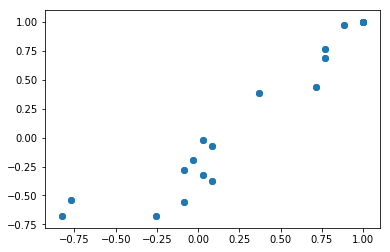

In [28]:
spearman_values = np.array(data.corr('spearman').values.tolist()).flatten()
pearson_values = np.array(data.corr('pearson').values.tolist()).flatten()

plt.scatter(spearman_values, pearson_values)